In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st

In [2]:
df = pd.read_csv('MOVIMENTACAO_SIFAO_01_23_A_04_24.csv')

In [3]:
df

,Mês,Compras,Qtd Comprada,Valor Comprado,Qtd Vendida,Valor Vendido,Pr. Venda Médio
0,04/2024,0,0,0.0,0,0.00,0.00
1,03/2024,0,0,0.0,0,0.00,0.00
2,02/2024,0,0,0.0,0,-0.87,0.00
3,01/2024,0,0,0.0,0,0.00,0.00
4,12/2023,0,0,0.0,7,83.52,11.93
5,11/2023,0,0,0.0,10,124.58,12.46
6,10/2023,0,0,0.0,10,113.34,11.33
7,09/2023,0,0,0.0,11,120.73,10.98
8,08/2023,0,0,0.0,16,183.67,11.48
9,07/2023,1,100,399.0,18,219.99,12.22


In [4]:
df.dtypes

Mês                 object
Compras              int64
Qtd Comprada         int64
Valor Comprado     float64
Qtd Vendida          int64
Valor Vendido      float64
Pr. Venda Médio    float64
dtype: object

In [5]:
df[['mes','ano']] = pd.DataFrame(df['Mês'].str.split('/').tolist(), columns = ['mes','ano'])
df = df.sort_values(by=['ano','mes']).reset_index().drop(columns='index')
df

,Mês,Compras,Qtd Comprada,Valor Comprado,Qtd Vendida,Valor Vendido,Pr. Venda Médio,mes,ano
0,01/2023,0,0,0.0,0,0.00,0.00,01,2023
1,02/2023,1,100,399.0,5,61.14,12.23,02,2023
2,03/2023,0,0,0.0,13,157.33,12.10,03,2023
3,04/2023,0,0,0.0,11,142.52,12.96,04,2023
4,05/2023,0,0,0.0,10,129.65,12.97,05,2023
5,06/2023,0,0,0.0,17,208.36,12.26,06,2023
6,07/2023,1,100,399.0,18,219.99,12.22,07,2023
7,08/2023,0,0,0.0,16,183.67,11.48,08,2023
8,09/2023,0,0,0.0,11,120.73,10.98,09,2023
9,10/2023,0,0,0.0,10,113.34,11.33,10,2023


Text(0, 0.5, 'Produtos Vendidos')

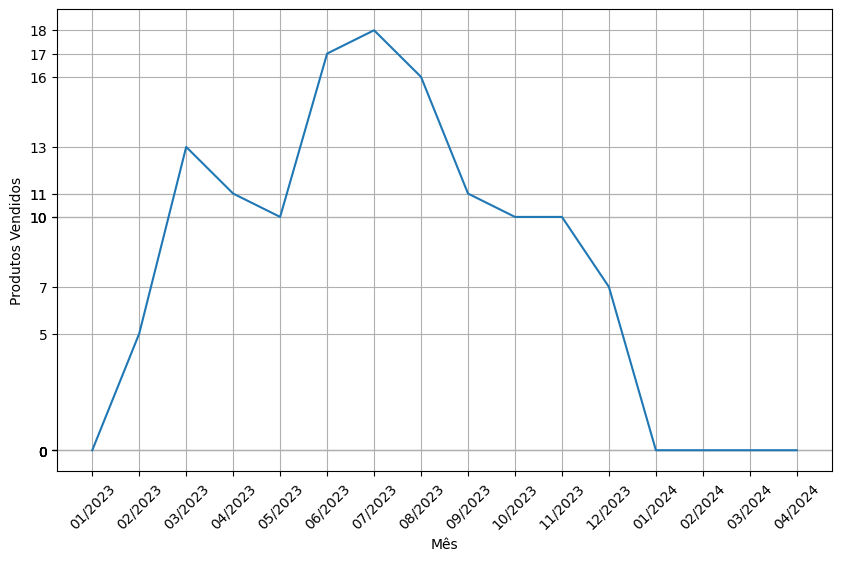

In [130]:
plt.figure(figsize=[10,6])
sns.lineplot(data=df, x='Mês', y='Qtd Vendida')
plt.grid(visible=True, axis='both')
plt.xticks(rotation= 45)
plt.yticks(ticks=df['Qtd Vendida'])
plt.ylabel('Produtos Vendidos')

In [8]:
df['estoque'] = df[['Qtd Comprada']].cumsum()['Qtd Comprada'] - df[['Qtd Vendida']].cumsum()['Qtd Vendida']
df

,Mês,Compras,Qtd Comprada,Valor Comprado,Qtd Vendida,Valor Vendido,Pr. Venda Médio,mes,ano,estoque
0,01/2023,0,0,0.0,0,0.00,0.00,01,2023,0
1,02/2023,1,100,399.0,5,61.14,12.23,02,2023,95
2,03/2023,0,0,0.0,13,157.33,12.10,03,2023,82
3,04/2023,0,0,0.0,11,142.52,12.96,04,2023,71
4,05/2023,0,0,0.0,10,129.65,12.97,05,2023,61
5,06/2023,0,0,0.0,17,208.36,12.26,06,2023,44
6,07/2023,1,100,399.0,18,219.99,12.22,07,2023,126
7,08/2023,0,0,0.0,16,183.67,11.48,08,2023,110
8,09/2023,0,0,0.0,11,120.73,10.98,09,2023,99
9,10/2023,0,0,0.0,10,113.34,11.33,10,2023,89


In [20]:

lead_time = 5
confianca = 0.95
df.loc[6:15]

,Mês,Compras,Qtd Comprada,Valor Comprado,Qtd Vendida,Valor Vendido,Pr. Venda Médio,mes,ano,estoque
6,07/2023,1,100,399.0,18,219.99,12.22,07,2023,126
7,08/2023,0,0,0.0,16,183.67,11.48,08,2023,110
8,09/2023,0,0,0.0,11,120.73,10.98,09,2023,99
9,10/2023,0,0,0.0,10,113.34,11.33,10,2023,89
10,11/2023,0,0,0.0,10,124.58,12.46,11,2023,79
11,12/2023,0,0,0.0,7,83.52,11.93,12,2023,72
12,01/2024,0,0,0.0,0,0.00,0.00,01,2024,72
13,02/2024,0,0,0.0,0,-0.87,0.00,02,2024,72
14,03/2024,0,0,0.0,0,0.00,0.00,03,2024,72
15,04/2024,0,0,0.0,0,0.00,0.00,04,2024,72


In [79]:
df_resume = pd.DataFrame(data={'Produto' : np.array(['Sifão' for _ in range(5)])})
df_resume['Lead Time'] = np.array([1,2,3,4,5])
df_resume['Compras'] = df.loc[6:15]['Qtd Comprada'].sum()
df_resume['Vendas'] = df.loc[6:15]['Qtd Vendida'].sum()
df_resume['Demanda'] = df.loc[6:15]['Qtd Vendida'].mean()
df_resume['Desvio'] = df.loc[6:15]['Qtd Vendida'].std()
df_resume['Reserva'] = st.norm.ppf(confianca) * np.sqrt(df_resume['Desvio'].pow(2)  * df_resume['Lead Time'] + (df_resume['Demanda'].pow(2)))
df_resume['Minimo'] = df_resume['Demanda'] * df_resume['Lead Time'] + df_resume['Reserva']
df_resume['Maximo'] = (df_resume['Demanda'] + df_resume['Reserva']) * df_resume['Lead Time']
df_resume


,Produto,Lead Time,Compras,Vendas,Demanda,Desvio,Reserva,Minimo,Maximo
0,Sifão,1,100,72,7.2,6.924995,16.431714,23.631714,23.631714
1,Sifão,2,100,72,7.2,6.924995,19.993675,34.393675,54.387351
2,Sifão,3,100,72,7.2,6.924995,23.010713,44.610713,90.632138
3,Sifão,4,100,72,7.2,6.924995,25.675645,54.475645,131.502579
4,Sifão,5,100,72,7.2,6.924995,28.088869,64.088869,176.444346


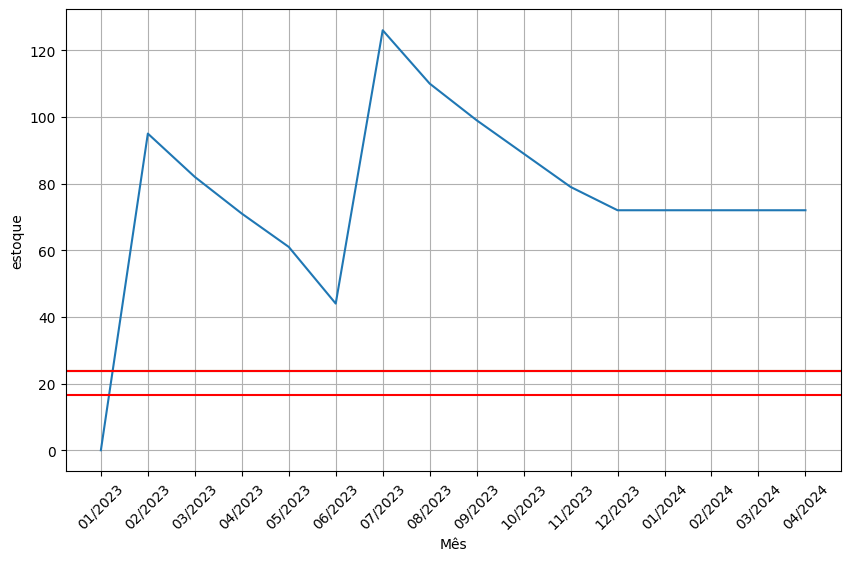

In [87]:
periodo = 0
plt.figure(figsize=[10,6])
sns.lineplot(data=df, x='Mês', y='estoque')
plt.grid(visible=True, axis='both')
plt.xticks(rotation= 45)
plt.axline((0,df_resume['Minimo'][periodo]),(1,df_resume['Minimo'][periodo]), color='g')
plt.axline((0,df_resume['Maximo'][periodo]),(1,df_resume['Maximo'][periodo]), color='r')
plt.axline((0,df_resume['Reserva'][periodo]),(1,df_resume['Reserva'][periodo]), color='r')

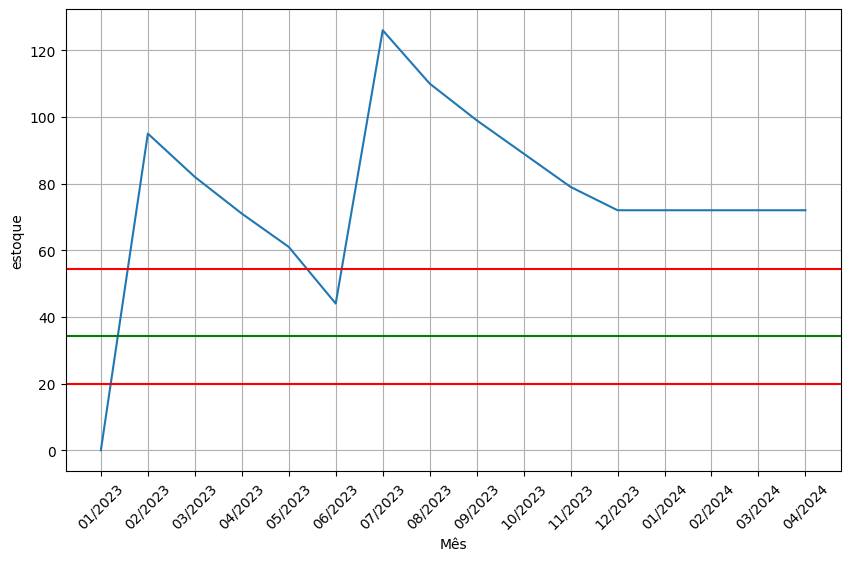

In [83]:
periodo = 1
plt.figure(figsize=[10,6])
sns.lineplot(data=df, x='Mês', y='estoque')
plt.grid(visible=True, axis='both')
plt.xticks(rotation= 45)
plt.axline((0,df_resume['Minimo'][periodo]),(1,df_resume['Minimo'][periodo]), color='g')
plt.axline((0,df_resume['Maximo'][periodo]),(1,df_resume['Maximo'][periodo]), color='r')
plt.axline((0,df_resume['Reserva'][periodo]),(1,df_resume['Reserva'][periodo]), color='r')

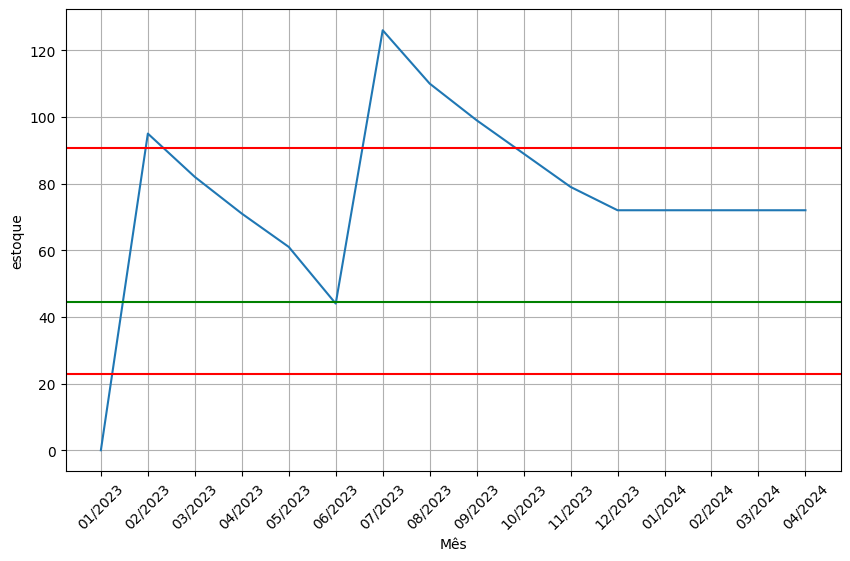

In [86]:
periodo = 2
plt.figure(figsize=[10,6])
sns.lineplot(data=df, x='Mês', y='estoque')
plt.grid(visible=True, axis='both')
plt.xticks(rotation= 45)
plt.axline((0,df_resume['Minimo'][periodo]),(1,df_resume['Minimo'][periodo]), color='g')
plt.axline((0,df_resume['Maximo'][periodo]),(1,df_resume['Maximo'][periodo]), color='r')
plt.axline((0,df_resume['Reserva'][periodo]),(1,df_resume['Reserva'][periodo]), color='r')

In [96]:
df.loc[6,'x1'] = 399.0
for i in range(2):
    df.loc[6+i,'x2'] = 399.0 / 2

for i in range(3):
    df.loc[6+i,'x3'] = 399.0 / 3

for i in range(4):
    df.loc[6+i,'x4'] = 399.0 / 4

for i in range(5):
    df.loc[6+i,'x5'] = 399.0 / 5

for i in range(6):
    df.loc[6+i,'x6'] = 399.0 / 6

df = df.replace(np.NAN,0.0)
df.loc[6:15]

,Mês,Compras,Qtd Comprada,Valor Comprado,Qtd Vendida,Valor Vendido,Pr. Venda Médio,mes,ano,estoque,x1,x2,x3,x4,x5,x6
6,07/2023,1,100,399.0,18,219.99,12.22,07,2023,126,399.0,199.5,133.0,99.75,79.8,66.5
7,08/2023,0,0,0.0,16,183.67,11.48,08,2023,110,0.0,199.5,133.0,99.75,79.8,66.5
8,09/2023,0,0,0.0,11,120.73,10.98,09,2023,99,0.0,0.0,133.0,99.75,79.8,66.5
9,10/2023,0,0,0.0,10,113.34,11.33,10,2023,89,0.0,0.0,0.0,99.75,79.8,66.5
10,11/2023,0,0,0.0,10,124.58,12.46,11,2023,79,0.0,0.0,0.0,0.00,79.8,66.5
11,12/2023,0,0,0.0,7,83.52,11.93,12,2023,72,0.0,0.0,0.0,0.00,0.0,66.5
12,01/2024,0,0,0.0,0,0.00,0.00,01,2024,72,0.0,0.0,0.0,0.00,0.0,0.0
13,02/2024,0,0,0.0,0,-0.87,0.00,02,2024,72,0.0,0.0,0.0,0.00,0.0,0.0
14,03/2024,0,0,0.0,0,0.00,0.00,03,2024,72,0.0,0.0,0.0,0.00,0.0,0.0
15,04/2024,0,0,0.0,0,0.00,0.00,04,2024,72,0.0,0.0,0.0,0.00,0.0,0.0


In [114]:
df.loc[6:15,'lucro_x1'] = df.loc[6:15]['Valor Vendido'].cumsum() - df.loc[6:15]['x1'].cumsum()
df.loc[6:15,'lucro_x2'] = df.loc[6:15]['Valor Vendido'].cumsum() - df.loc[6:15]['x2'].cumsum()
df.loc[6:15,'lucro_x3'] = df.loc[6:15]['Valor Vendido'].cumsum() - df.loc[6:15]['x3'].cumsum()
df.loc[6:15,'lucro_x4'] = df.loc[6:15]['Valor Vendido'].cumsum() - df.loc[6:15]['x4'].cumsum()
df.loc[6:15,'lucro_x5'] = df.loc[6:15]['Valor Vendido'].cumsum() - df.loc[6:15]['x5'].cumsum()
df.loc[6:15,'lucro_x6'] = df.loc[6:15]['Valor Vendido'].cumsum() - df.loc[6:15]['x6'].cumsum()
df.loc[6:15]

,Mês,Compras,Qtd Comprada,Valor Comprado,Qtd Vendida,Valor Vendido,Pr. Venda Médio,mes,ano,estoque,...,x3,x4,x5,x6,lucro_x1,lucro_x2,lucro_x3,lucro_x4,lucro_x5,lucro_x6
6,07/2023,1,100,399.0,18,219.99,12.22,07,2023,126,...,133.0,99.75,79.8,66.5,-179.01,20.49,86.99,120.24,140.19,153.49
7,08/2023,0,0,0.0,16,183.67,11.48,08,2023,110,...,133.0,99.75,79.8,66.5,4.66,4.66,137.66,204.16,244.06,270.66
8,09/2023,0,0,0.0,11,120.73,10.98,09,2023,99,...,133.0,99.75,79.8,66.5,125.39,125.39,125.39,225.14,284.99,324.89
9,10/2023,0,0,0.0,10,113.34,11.33,10,2023,89,...,0.0,99.75,79.8,66.5,238.73,238.73,238.73,238.73,318.53,371.73
10,11/2023,0,0,0.0,10,124.58,12.46,11,2023,79,...,0.0,0.00,79.8,66.5,363.31,363.31,363.31,363.31,363.31,429.81
11,12/2023,0,0,0.0,7,83.52,11.93,12,2023,72,...,0.0,0.00,0.0,66.5,446.83,446.83,446.83,446.83,446.83,446.83
12,01/2024,0,0,0.0,0,0.00,0.00,01,2024,72,...,0.0,0.00,0.0,0.0,446.83,446.83,446.83,446.83,446.83,446.83
13,02/2024,0,0,0.0,0,-0.87,0.00,02,2024,72,...,0.0,0.00,0.0,0.0,445.96,445.96,445.96,445.96,445.96,445.96
14,03/2024,0,0,0.0,0,0.00,0.00,03,2024,72,...,0.0,0.00,0.0,0.0,445.96,445.96,445.96,445.96,445.96,445.96
15,04/2024,0,0,0.0,0,0.00,0.00,04,2024,72,...,0.0,0.00,0.0,0.0,445.96,445.96,445.96,445.96,445.96,445.96


Text(0, 0.5, 'Lucro (R$)')

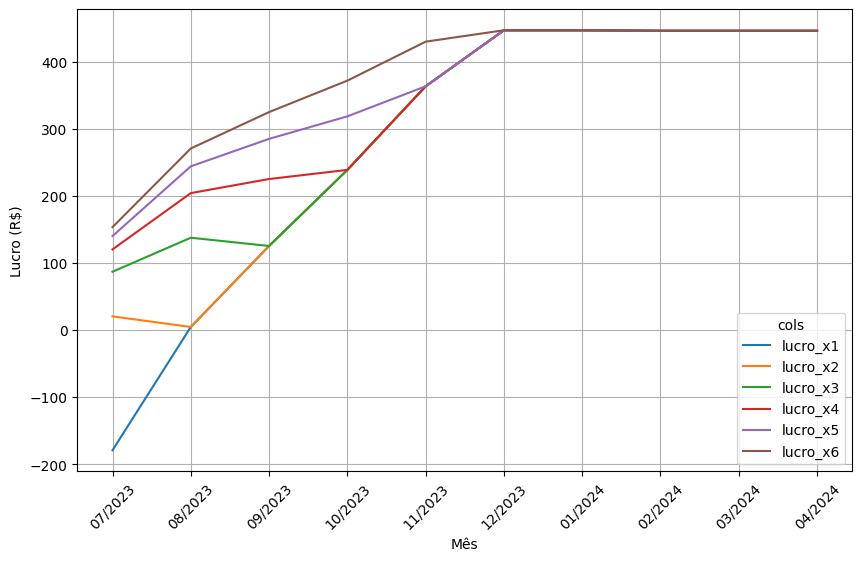

In [148]:
df_lucros = df.loc[6:15][['Mês','lucro_x1','lucro_x2','lucro_x3','lucro_x4','lucro_x5','lucro_x6']].melt('Mês', var_name='cols', value_name='vals')
plt.figure(figsize=[10,6])
sns.lineplot(data=df_lucros, x='Mês', y='vals', hue='cols')
plt.grid(visible=True, axis='both')
plt.xticks(rotation= 45)
plt.ylabel('Lucro (R$)')